In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn.svm import SVR, OneClassSVM, NuSVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore, t

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import IsolationForest

from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.neighbors import LocalOutlierFactor


from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

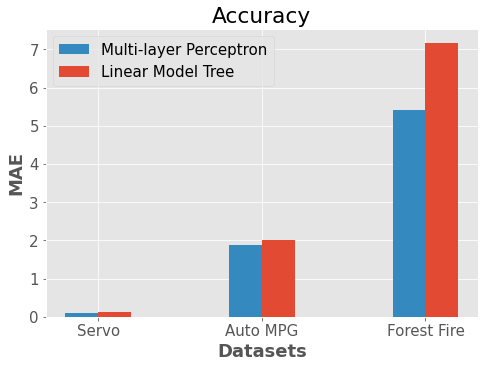

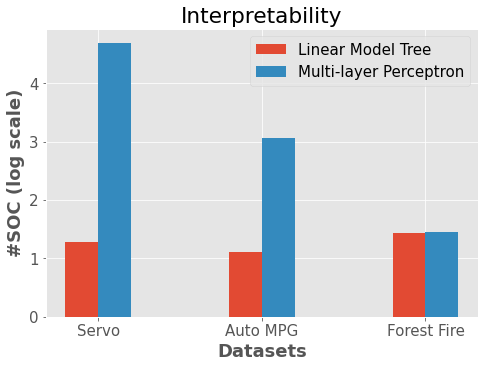

In [2]:

mlp=np.asarray([0.08672,1.8812,5.4141])
lmt=np.asarray([0.133,2.015,7.180])

lmt_soc=np.log(np.asarray([19,13,27]))/np.log(10)
mlp_soc=np.log(np.asarray([49593,1156,28]))/np.log(10)

x=np.asarray(['Servo','Auto MPG','Forest Fire'])
plt.rcParams.update({'font.size': 15})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Accuracy')
ax.set_ylabel('MAE',fontweight='bold')
ax.set_xlabel('Datasets',fontweight='bold')
ax.bar(x,mlp,width=0.4,color='#348abe')
ax.bar(x,lmt,width=0.2,align='edge',color='#e24a33')
ax.legend(labels=['Multi-layer Perceptron','Linear Model Tree'])
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Interpretability')
ax.set_ylabel('#SOC (log scale)',fontweight='bold')
ax.set_xlabel('Datasets',fontweight='bold')
ax.bar(x,lmt_soc,width=0.4,color='#e24a33')
ax.bar(x,mlp_soc,width=0.2,align='edge',color='#348abe')


ax.legend(labels=['Linear Model Tree','Multi-layer Perceptron'])
plt.show()




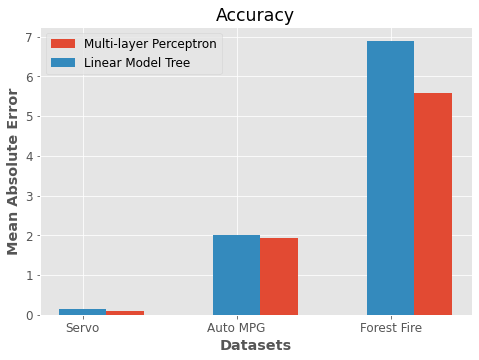

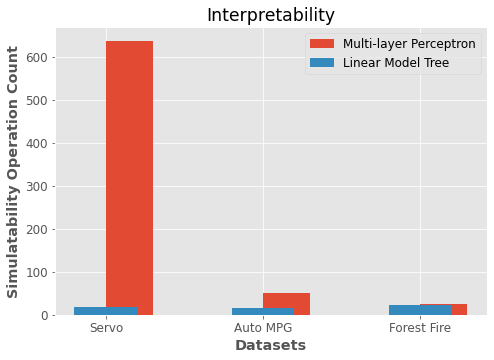

In [3]:

lmt=np.asarray([0.134,2.01,6.90])
mlp=np.asarray([0.088,1.920,5.576])
linreg=np.asarray([0.863,2.304,6.723])


lmt_soc=np.asarray([17,15,23])
mlp_soc=np.asarray([638,50,25])
linreg_soc=np.asarray([8,10,12])

x=np.asarray(['Servo','Auto MPG','Forest Fire'])
plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Accuracy')
ax.set_ylabel('Mean Absolute Error',fontweight='bold')
ax.set_xlabel('Datasets',fontweight='bold')
ax.bar(x,mlp,width=0.4,align='edge')
ax.bar(x,lmt,width=0.3)
ax.legend(labels=['Multi-layer Perceptron', 'Linear Model Tree'])
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Interpretability')
ax.set_ylabel('Simulatability Operation Count',fontweight='bold')
ax.set_xlabel('Datasets',fontweight='bold')
ax.bar(x,mlp_soc,width=0.3,align='edge')
ax.bar(x,lmt_soc,width=0.4)

ax.legend(labels=['Multi-layer Perceptron', 'Linear Model Tree'])
plt.show()





Text(0, 0.5, 'Error rate increase (%)')

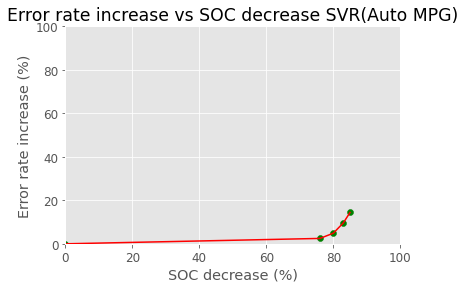

In [4]:
y=np.asarray([0,2.47,4.86,9.6,14.4])
x=np.asarray([0,76,80,83,85])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(x,y,color='g')
plt.plot(x,y,color='r')
plt.title("Error rate increase vs SOC decrease SVR(Auto MPG)")
plt.xlabel("SOC decrease (%)")
plt.ylabel("Error rate increase (%)")

Text(0, 0.5, 'Error rate increase (%)')

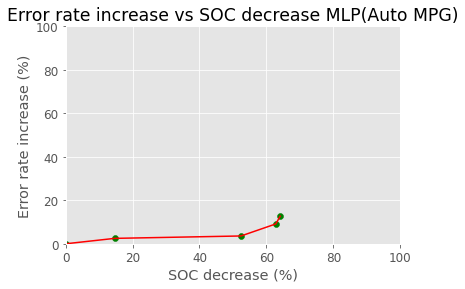

In [5]:
y=np.asarray([0,2.5,3.6,9.14,12.7])
x=np.asarray([0,14.7,52.4,62.8,64.1])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(x,y,color='g')
plt.plot(x,y,color='r')
plt.title("Error rate increase vs SOC decrease MLP(Auto MPG)")
plt.xlabel("SOC decrease (%)")
plt.ylabel("Error rate increase (%)")

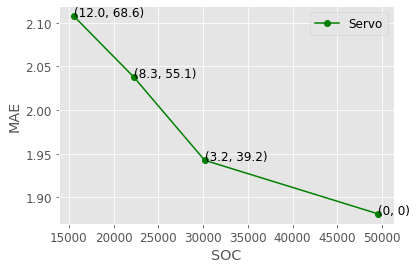

In [6]:
# to draw in one graph, we scale to match Auto MPG graph axis
servo_scale_x=21.69280442804428
servo_scale_y=1
y=np.asarray([0.08672,0.08955,0.09393,0.097145])
x=np.asarray([49593,30173,22263,15553])
txt = np.asarray(['(0, 0)','(3.2, 39.2)','(8.3, 55.1)','(12.0, 68.6)'])
plt.plot(x,y*21.69280442804428,color='g',marker='o',label='Servo')
# plt.title("Error rate increase vs SOC decrease MLP(Auto MPG)")
plt.xlabel("SOC")
plt.ylabel("MAE")
plt.legend()
for i, txt in enumerate(txt):
    plt.annotate(txt, (x[i], y[i]*21.69280442804428))



In [7]:
1156/28

41.285714285714285

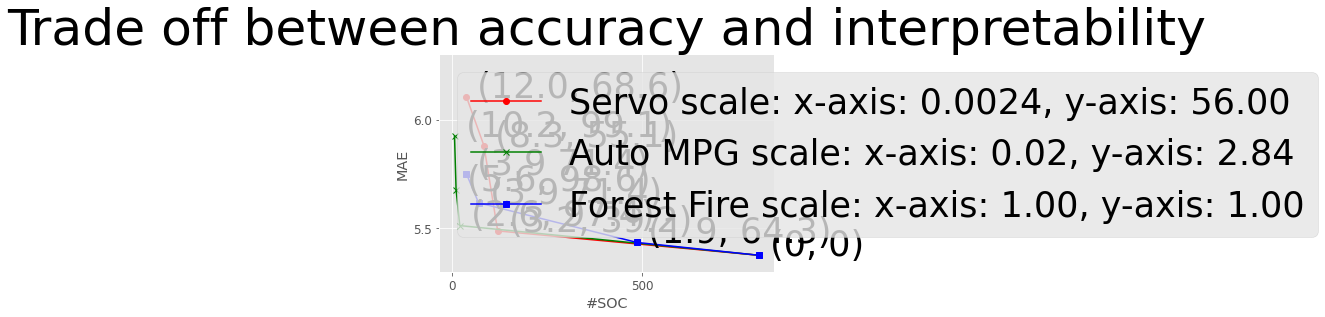

In [8]:
servo_scale_y=5.376/0.096
servo_scale_x=806/339371
servo_y=np.asarray([0.096,0.098,0.105,0.109])*servo_scale_y
servo_x=np.asarray([339371,50583,35403,16103])*servo_scale_x
servo_txt = np.asarray([' (0, 0)',' (3.2, 39.2)',' (8.3, 55.1)',' (12.0, 68.6)'])

forest_scale_y=1
forest_scale_x=1
forest_y=np.asarray([5.376,5.435,5.617,5.751])*forest_scale_y
forest_x=np.asarray([806,486,70,38])*forest_scale_x
forest_txt = np.asarray([' (0, 0)',' (1.9, 64.3)',' (3.9 71.4)', ' (3.9 71.4)'])

auto_scale_y=5.376/1.890
auto_scale_x=806/45393
auto_y=np.asarray([1.890,1.938,1.996,2.083])*auto_scale_y
auto_x=np.asarray([45393,1163,613,383])*auto_scale_x
auto_txt = np.asarray([' (0, 0)',' (2.6, 97.4)',' (5.6, 98.6)',' (10.2, 99.1)'])
plt.plot(servo_x,servo_y,color='r',marker='o',label='Servo scale: x-axis: {:.4f}, y-axis: {:.2f}'.format(servo_scale_x,servo_scale_y))
plt.plot(auto_x,auto_y,color='g',marker='x',label='Auto MPG scale: x-axis: {:.2f}, y-axis: {:.2f}'.format(auto_scale_x,auto_scale_y))
plt.plot(forest_x,forest_y,color='b',marker='s',label='Forest Fire scale: x-axis: {:.2f}, y-axis: {:.2f}'.format(forest_scale_x,forest_scale_y))

# plt.plot(servo_x,servo_y,color='r',marker='o' )
# plt.plot(auto_x,auto_y,color='g',marker='x' )
# plt.plot(forest_x,forest_y,color='b',marker='s')

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
plt.rcParams.update({'font.size': 35})

plt.title("Trade off between accuracy and interpretability")
plt.xlabel("#SOC")
plt.ylabel("MAE")
plt.legend()


# plt.xlim(10, 45393)
plt.ylim(5.3,6.3)

for i, txt in enumerate(servo_txt):
    plt.annotate(txt, (servo_x[i], servo_y[i]))
for i, txt in enumerate(auto_txt):
    if i == 0:
        continue
    plt.annotate(txt, (auto_x[i], auto_y[i]))
for i, txt in enumerate(forest_txt):
    if i==0:
        continue
    plt.annotate(txt, (forest_x[i], forest_y[i]))

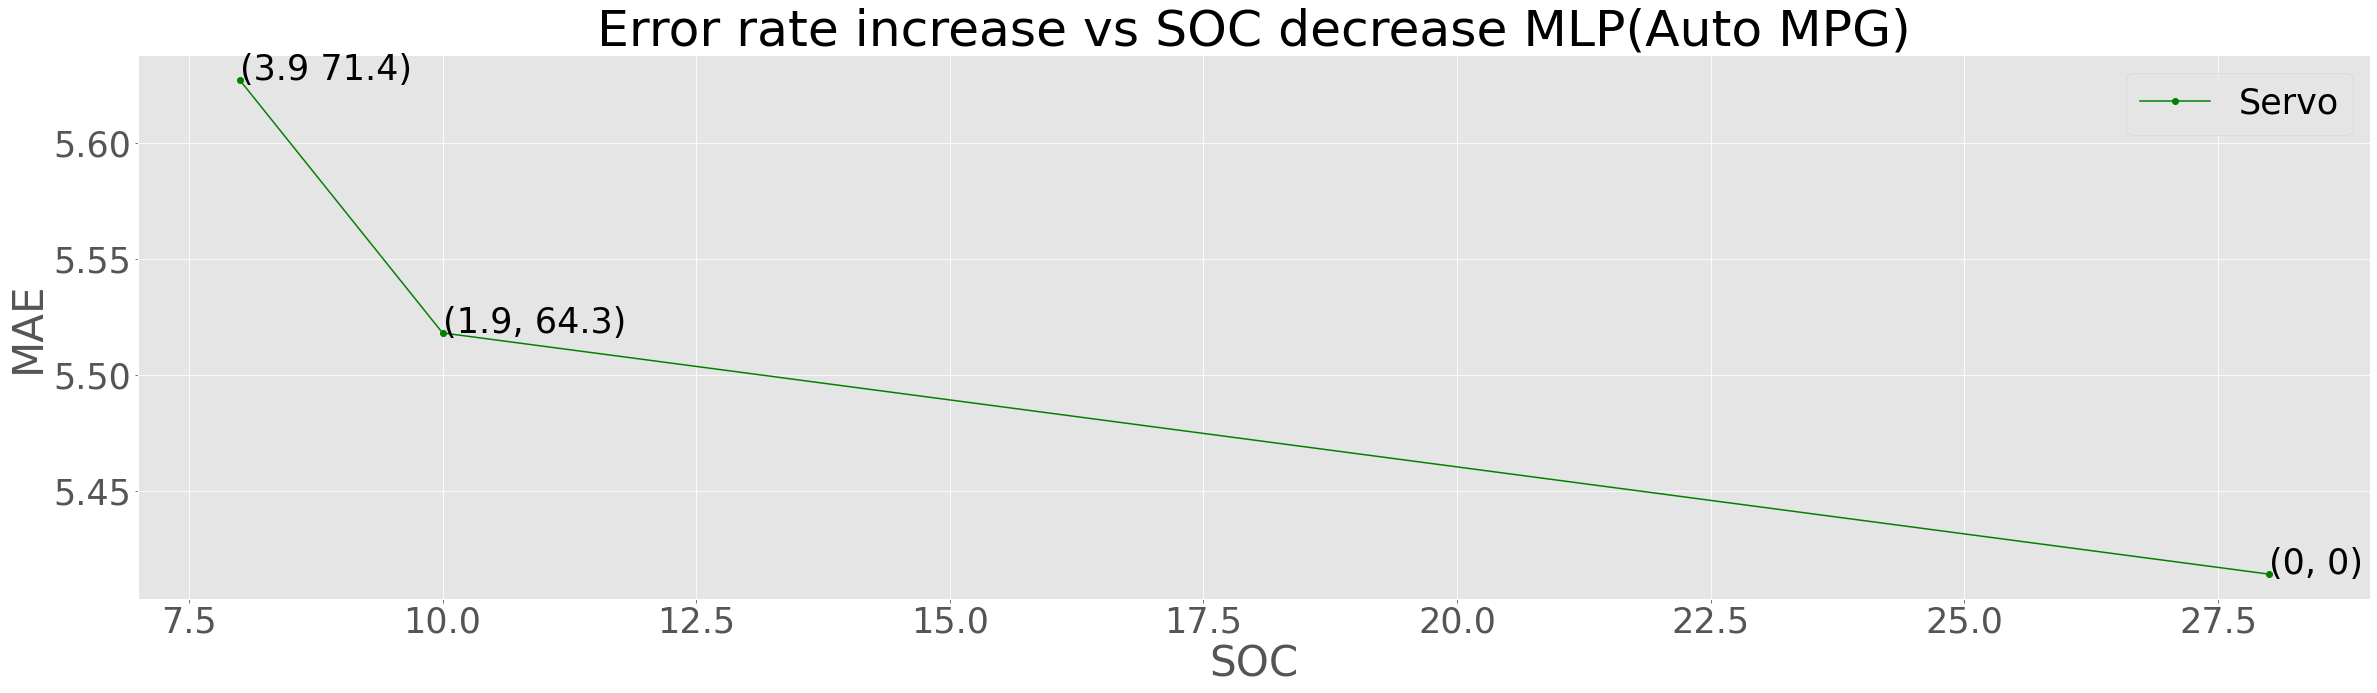

In [9]:
y=np.asarray([5.4141,5.518,5.627])
x=np.asarray([28,10,8])
txt = np.asarray(['(0, 0)','(1.9, 64.3)','(3.9 71.4)'])
plt.plot(x,y,color='g',marker='o',label='Servo')
plt.title("Error rate increase vs SOC decrease MLP(Auto MPG)")
plt.xlabel("SOC")
plt.ylabel("MAE")
plt.legend()
for i, txt in enumerate(txt):
    plt.annotate(txt, (x[i], y[i]))



#### 

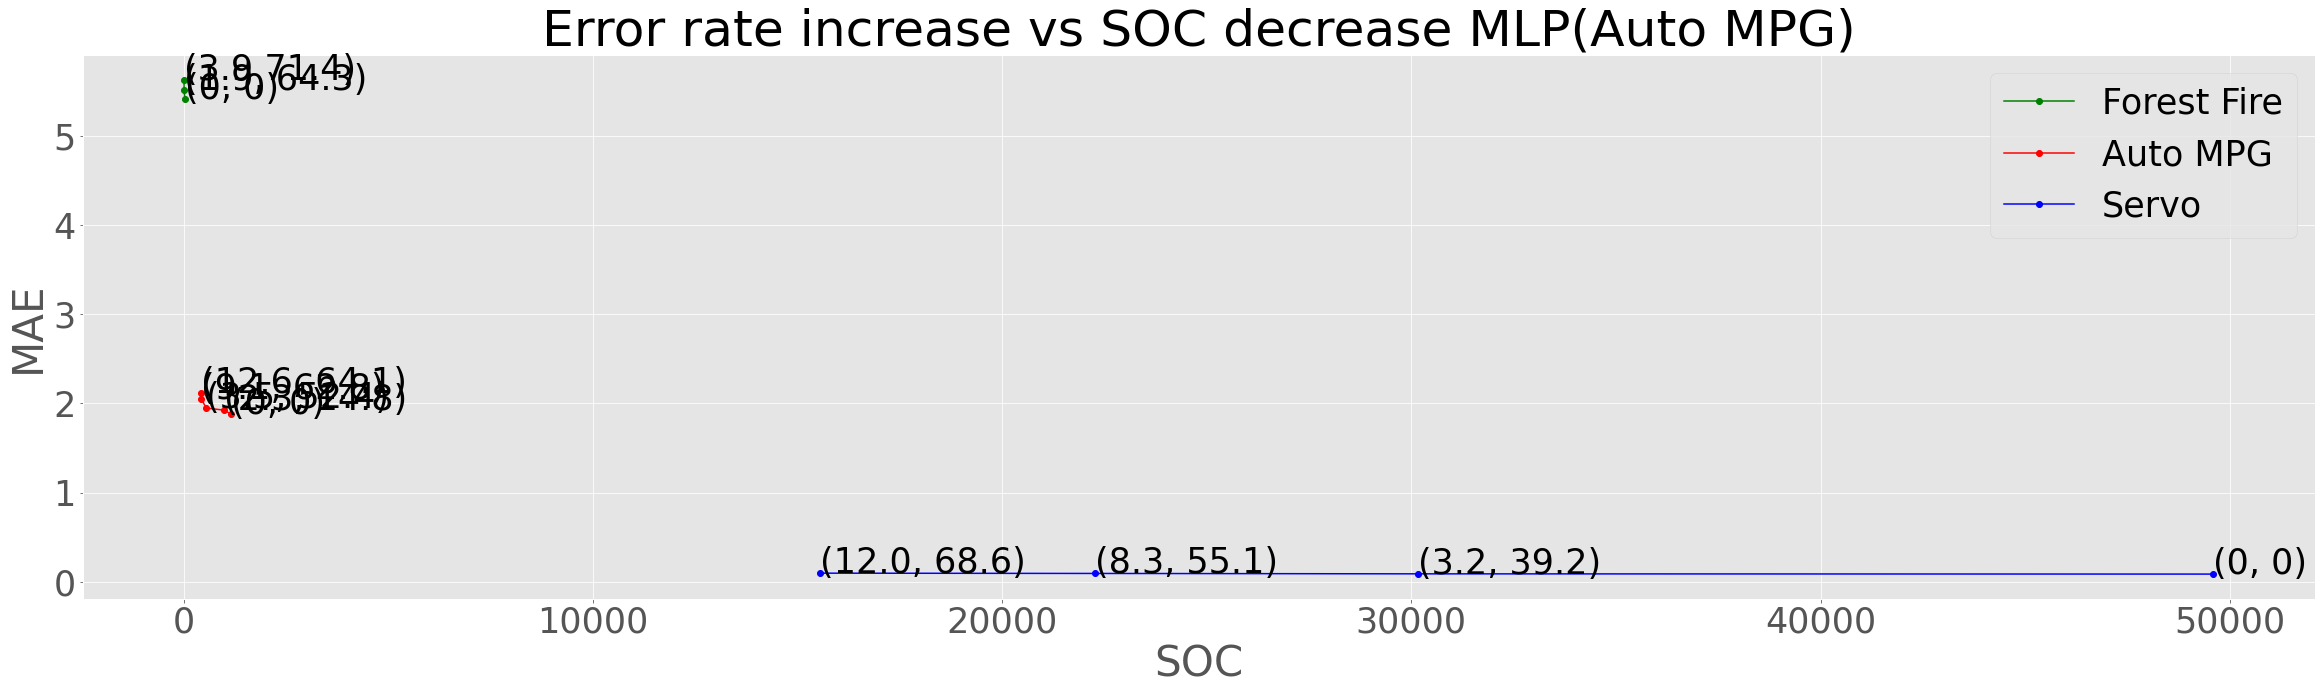

In [10]:
y=np.asarray([5.4141,5.518,5.627])
x=np.asarray([28,10,8])
txt = np.asarray(['(0, 0)','(1.9, 64.3)','(3.9 71.4)'])
plt.plot(x,y,color='g',marker='o',label='Forest Fire')
plt.title("Error rate increase vs SOC decrease MLP(Auto MPG)")
plt.xlabel("SOC")
plt.ylabel("MAE")
plt.legend()
for i, txt in enumerate(txt):
    plt.annotate(txt, (x[i], y[i]))

y=np.asarray([1.8812,1.9246,1.9487,2.0519,2.1188])
x=np.asarray([1156,985,550,430,415])
txt = np.asarray(['(0, 0)','(2.3, 14.8)','(3.5, 52.4)','(9.1, 62.8)','(12.6, 64.1)'])
# plt.xlim(0, 100)
# plt.ylim(0, 100)
# plt.scatter(x,y,color='g')
plt.plot(x,y,color='r',marker='o',label='Auto MPG')
# plt.title("Error rate increase vs SOC decrease MLP(Auto MPG)")
plt.xlabel("SOC")
plt.ylabel("MAE")
plt.legend()


for i, txt in enumerate(txt):
    plt.annotate(txt, (x[i], y[i]))
    
y=np.asarray([0.08672,0.08955,0.09393,0.097145])
x=np.asarray([49593,30173,22263,15553])
txt = np.asarray(['(0, 0)','(3.2, 39.2)','(8.3, 55.1)','(12.0, 68.6)'])
plt.plot(x,y,color='b',marker='o',label='Servo')
# plt.title("Error rate increase vs SOC decrease MLP(Auto MPG)")
plt.xlabel("SOC")
plt.ylabel("MAE")
plt.legend()
for i, txt in enumerate(txt):
    plt.annotate(txt, (x[i], y[i]))



In [11]:
13*1156/19

790.9473684210526

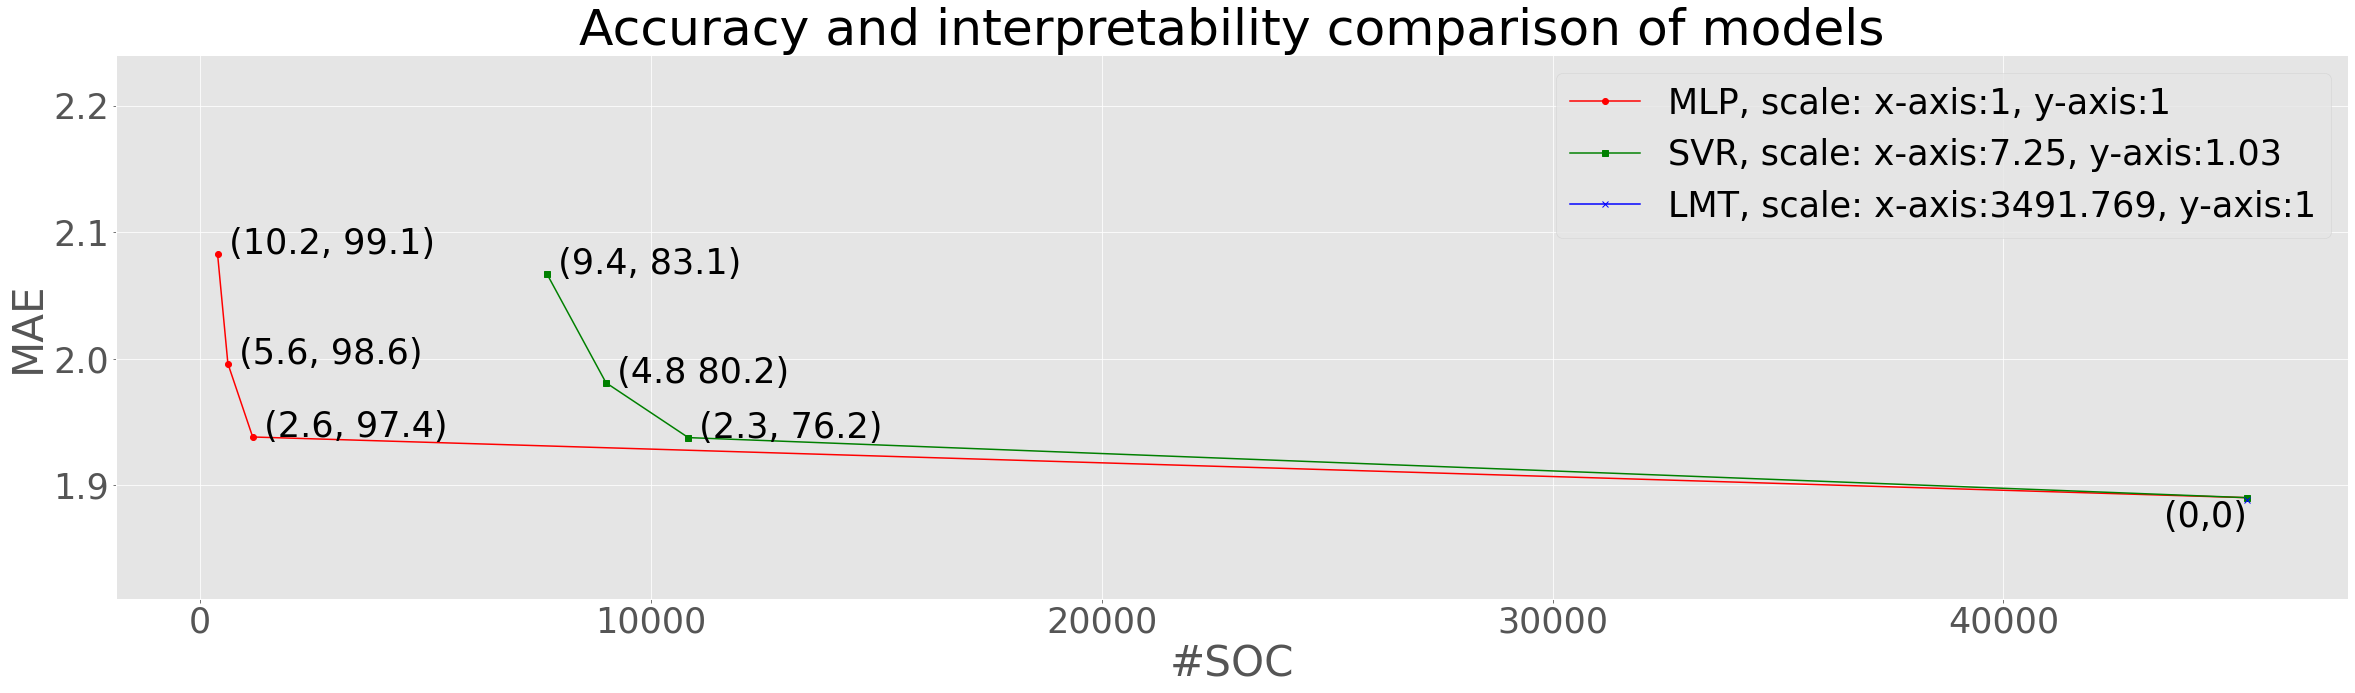

In [12]:
mlp_y=np.asarray([1.890,1.938,1.996,2.083])
mlp_x=np.asarray([45393,1163,613,383])
mlp_txt = np.asarray([' (0, 0)',' (2.6, 97.4)',' (5.6, 98.6)',' (10.2, 99.1)'])
plt.plot(mlp_x,mlp_y,color='r',marker='o',label='MLP, scale: x-axis:1, y-axis:1')

svr_scale_x=45393/6264
svr_scale_y=1.890/1.830
svr_y=np.asarray([1.830,1.876,1.918,2.001])*svr_scale_y
svr_x=np.asarray([6264,1494,1242,1062])*svr_scale_x
svr_txt = np.asarray([' (0, 0)',' (2.3, 76.2)',' (4.8 80.2)',' (9.4, 83.1)'])
plt.plot(svr_x,svr_y,color='g',marker='s',label='SVR, scale: x-axis:{:.2f}, y-axis:{:.2f}'.format(svr_scale_x,svr_scale_y))

lmt_scale_x=45393/13
lmt_y=np.asarray([1.8885])
lmt_x=np.asarray([13,])*lmt_scale_x
lmt_txt = np.asarray(['(0,0)'])
plt.plot(lmt_x,lmt_y,color='b',marker='x',label='LMT, scale: x-axis:%.3f, y-axis:1'%lmt_scale_x)

plt.title("Accuracy and interpretability comparison of models")
plt.xlabel("#SOC")
plt.ylabel("MAE")

plt.legend()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
plt.rcParams.update({'font.size': 35})

# plt.xlim(300, 1200)
plt.ylim(1.81, 2.24)

for i, txt in enumerate(mlp_txt):
    if i== 0:
        continue
    plt.annotate(txt, (mlp_x[i], mlp_y[i]))

for i, txt in enumerate(svr_txt):
    if i == 0:
        continue
    plt.annotate(txt, (svr_x[i], svr_y[i]))


for i, txt in enumerate(lmt_txt):
    plt.annotate(txt, (lmt_x[i], lmt_y[i]), horizontalalignment='right',verticalalignment='top')



In [13]:
svr_y=np.asarray([1.830,1.876,1.918,2.001])*svr_scale_y
print(svr_y)
svr_x=np.asarray([6264,1494,1242,1062])*svr_scale_x
svr_x

[1.89       1.9375082  1.98088525 2.06660656]


array([45393.        , 10826.49137931,  9000.3362069 ,  7695.93965517])

In [ ]:
x=np.asarray(['Servo','Auto MPG','Forest Fire'])
lmt= [0.133,1.8885,7.180]
mlp=[ 0.087,1.8812,5.576]
svr=[ 0.227,1.830,5.147]
plt.plot(x,lmt,marker='o',label='LMT')
plt.plot(x,mlp,marker='x',label='MLP')
plt.plot(x,svr,marker='s',label='SVR')

plt.title("Accuracy")
plt.xlabel("Datasets")
plt.ylabel("MAE")

plt.legend()


[[4.42608696]
 [4.47937132]
 [1.47434211]
 [7.11597005]
 [4.92911888]
 [6.94625811]
 [8.81714455]]


ValueError: operands could not be broadcast together with shapes (8,) (7,) 

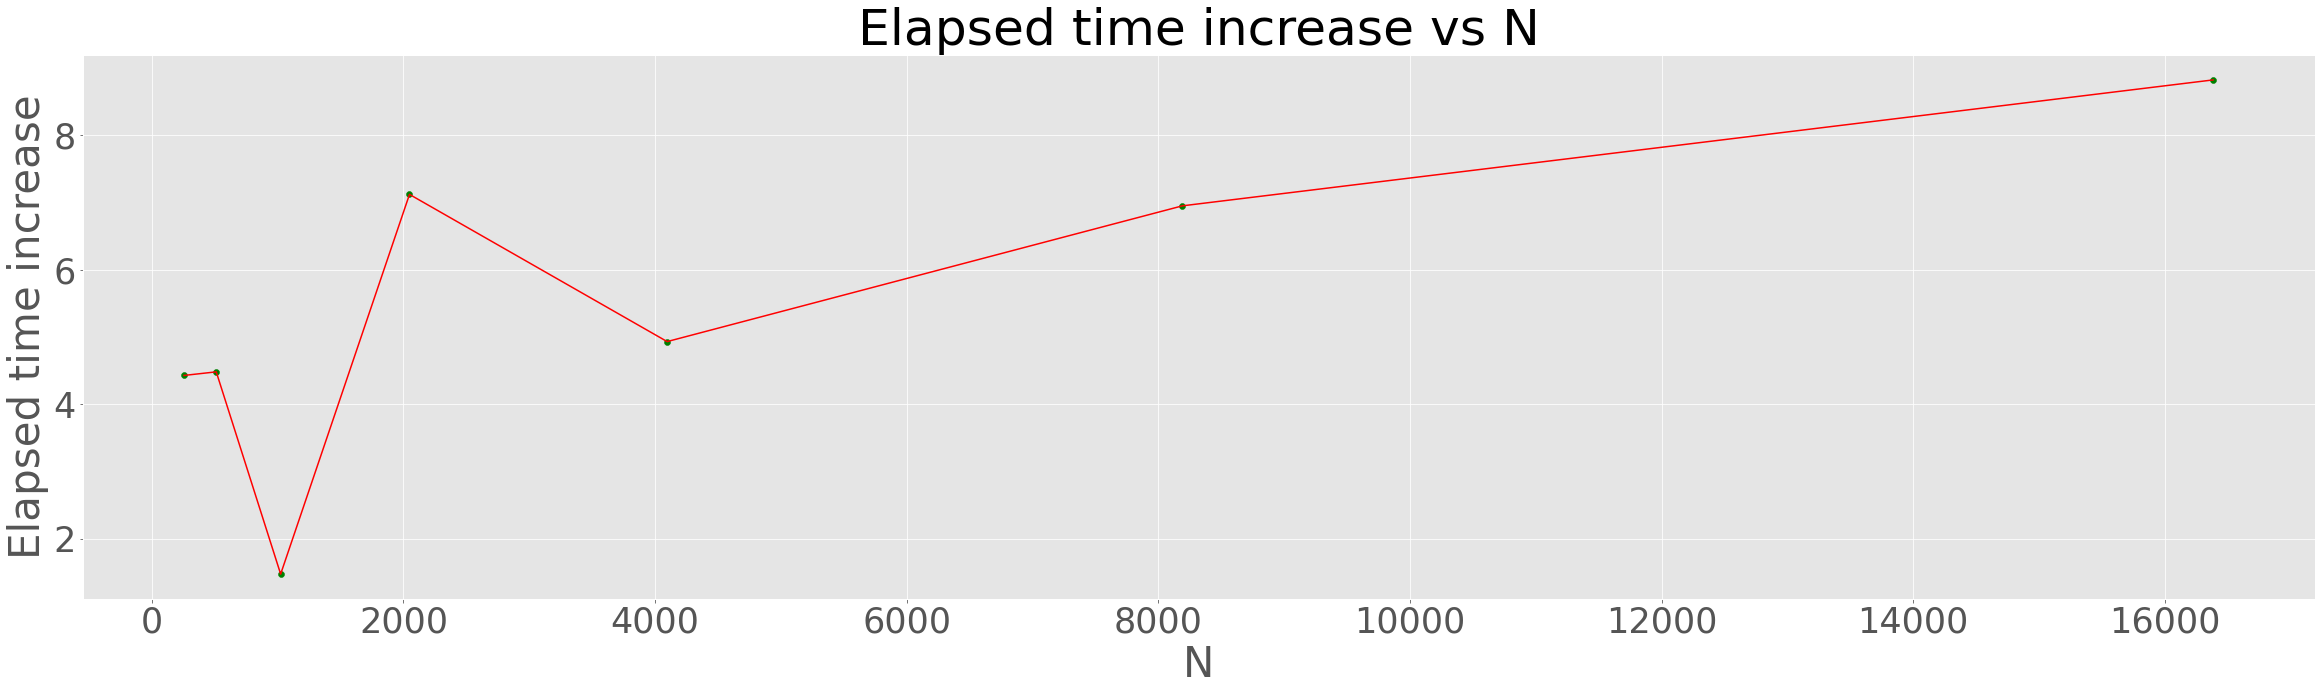

In [24]:
time=np.asarray([0.000690,0.003054,0.013680,0.020169,0.143522,0.707437,4.914040,43.327801])
y = np.zeros((7,1))
for i in range(1,8):
    y[i-1]=time[i]/time[i-1]
print(y)
x=np.asarray([256, 512, 1024,2048,4096,8192,16384])

plt.scatter(x,y,color='g')
plt.plot(x,y,color='r')
plt.title("Elapsed time increase vs N")
plt.xlabel("N")
plt.ylabel("Elapsed time increase")


In [28]:
time=np.asarray([0.000690,0.003054,0.013680,0.020169,0.143522,0.707437,4.914040,43.327801])
x=np.asarray([128, 256, 512, 1024,2048,4096,8192,16384])
np.mean((x**3)/time)/10**10

5.524398051394747